## Ottengo i dati necessari
Poiché non esiste alcun dataset 

#### Ottengo n mazzi
Tramite richiesta GET aggiungo al dizionario n mazzi unici e pubblici dall'API del sito https://archidekt.com, nel quale tutti gli utenti possono caricare e condividere i propri mazzi

In [2]:
import threading
import requests
import time
import queue, random

# URL della richiesta GET
archidekt_url = 'https://archidekt.com/api/decks/cards/'
decks = {}
page = 1

def deck_url_builder(commander, page, format=3):
    archidekt_url = 'https://archidekt.com/api/decks/cards/'
    return archidekt_url + f'?commanders={commander.replace(" ","+")}&formats=3&page={page}&pageSize=50'

# Funzione per effettuare richieste GET
def fetch_data(commander):
    global page
    response = requests.get(deck_url_builder(commander,page))
    queue.put(response)
    while response.json()["next"] is not None:
        page += 1
        response = requests.get(deck_url_builder(commander,page))
        queue.put(response)
        time.sleep(1) # per non sovraccaricare la API

# gestire le risposte
def handle_response():
    global decks
    while True:
        response = queue.get()
        if response.status_code == 200:
            try:
                data = response.json()["results"]
            except Exception as e: 
                print("bad data")
            if data == []:
                break
            for deck in data:
                decks = {**decks, **{deck.pop("id"):deck}}
            print(f'Mazzi fino a pagina {page - 1}: {len(decks)}', end='\r')
        else:
            print(f'Errore {response.status_code}', end='\r')


In [3]:

import queue

# Creazione della coda per comunicazione tra i thread
queue = queue.Queue()
commander = "Kodama of the West Tree"
# Creazione dei thread
fetch_thread_1 = threading.Thread(target=fetch_data,args=(commander,))
fetch_thread_2 = threading.Thread(target=fetch_data,args=(commander,))
fetch_thread_3 = threading.Thread(target=fetch_data,args=(commander,))
handle_thread = threading.Thread(target=handle_response)

# Avvio dei thread
fetch_thread_1.start()
fetch_thread_2.start()
fetch_thread_3.start()
handle_thread.start()

# Attesa della terminazione dei thread
fetch_thread_1.join()
fetch_thread_2.join()
fetch_thread_3.join()
handle_thread.join()

print(f'{len(decks)} mazzi ottenuti dopo {page - 1} pagine', end='\r')

In [4]:
from pprint import pprint 
pprint(decks)

{582100: {'cardPackage': None,
          'colors': {'B': 0, 'G': 56, 'R': 0, 'U': 0, 'W': 0},
          'customFeatured': '',
          'deckFormat': 3,
          'featured': 'https://storage.googleapis.com/archidekt-card-images/neo/ef1e1dff-b559-441d-8df3-b6a418066aca_art_crop.jpg',
          'game': None,
          'name': 'Kodama Mono Green BS',
          'owner': {'avatar': 'https://storage.googleapis.com/topdekt-user/avatars/default/avatar_orzhov.svg',
                    'id': 847,
                    'moderator': False,
                    'pledgeLevel': None,
                    'roles': [],
                    'username': 'sr925713'},
          'private': False,
          'tags': [],
          'theorycrafted': False,
          'unlisted': False,
          'updatedAt': '2022-04-01T20:49:02.182191Z',
          'viewCount': 145},
 728700: {'cardPackage': None,
          'colors': {'B': 0, 'G': 54, 'R': 0, 'U': 0, 'W': 0},
          'customFeatured': '',
          'deckFormat': 3,

In [11]:
import requests
import time
import queue

cards = {}
for deck_id, deck_info in decks.items():
    decks[deck_id] = {"seen":False, "name":deck_info["name"]}


def cards_url(deck_id):
    return f'https://archidekt.com/api/decks/{deck_id}/'


# Funzione per effettuare richieste GET
def fetch_cards():
    for deck_id, deck in decks.items():
        if deck["seen"]:
            continue

        response = requests.get(cards_url(deck_id))
        print(response.text)
        while response.status_code != 200:
            print("Uh abbiamo un problemino, riproviamo")
            time.sleep(1) # per non sovraccaricare la API
            response = requests.get(cards_url(deck_id))
    
        queue.put(response)
        deck["seen"] = True
        time.sleep(1) # per non sovraccaricare la API

# gestire le risposte
def handle_cards():
    while True:
        response = queue.get()
        try:
            data = response.json()["cards"]
            print(response.json()["cards"])
            break
        except:
            print("ah")


In [12]:

import queue

# Creazione della coda per comunicazione tra i thread
queue = queue.Queue()
# Creazione dei thread
fetch_thread_1 = threading.Thread(target=fetch_cards)
fetch_thread_2 = threading.Thread(target=fetch_cards)
fetch_thread_3 = threading.Thread(target=fetch_cards)
handle_thread = threading.Thread(target=handle_cards)

# Avvio dei thread
fetch_thread_1.start()
fetch_thread_2.start()
fetch_thread_3.start()
handle_thread.start()

# Attesa della terminazione dei thread
fetch_thread_1.join()
fetch_thread_2.join()
fetch_thread_3.join()
handle_thread.join()

print(f'{len(decks)} mazzi ottenuti dopo {page - 1} pagine', end='\r')

{"id":7504242,"name":"★ Green | Kodama of the West Tree | It's What's Inside That Counts ★","createdAt":"2024-04-27T06:41:05.378221Z","updatedAt":"2024-08-05T15:29:39.025383Z","deckFormat":3,"game":1,"description":"{\"ops\":[{\"insert\":\"Deck Theme: Beautiful on the Inside, Slimey on the Outside\\nPower Level: 7\\n\"}]}","viewCount":725,"featured":"https://storage.googleapis.com/archidekt-card-images/neo/b4a4aeaa-aff7-4299-8030-36eefd5acaf3_art_crop.jpg","customFeatured":"https://storage.googleapis.com/archidekt-card-images/neo/b4a4aeaa-aff7-4299-8030-36eefd5acaf3_art_crop.jpg","private":false,"unlisted":false,"theorycrafted":false,"points":0,"userInput":0,"owner":{"id":283853,"username":"Jeroney","avatar":"https://storage.googleapis.com/topdekt-user/avatars/avatar2838532023-10-16-19:47:04.png","frame":null,"ckAffiliate":"","tcgAffiliate":"","referrerEnum":null},"commentRoot":7515077,"editors":null,"parentFolder":587266,"bookmarked":false,"categories":[{"id":86072096,"name":"Cascade",

KeyboardInterrupt: 

{"id":8661452,"name":"Green Whiplash","createdAt":"2024-08-03T17:47:24.859271Z","updatedAt":"2024-08-03T18:45:19.143453Z","deckFormat":3,"game":1,"description":"","viewCount":16,"featured":"https://storage.googleapis.com/archidekt-card-images/neo/ef1e1dff-b559-441d-8df3-b6a418066aca_art_crop.jpg","customFeatured":"","private":false,"unlisted":false,"theorycrafted":false,"points":0,"userInput":0,"owner":{"id":469288,"username":"DodgyJack","avatar":"https://storage.googleapis.com/topdekt-user/avatars/avatar4692882024-07-29-16:19:53.png","frame":null,"ckAffiliate":"","tcgAffiliate":"","referrerEnum":null},"commentRoot":8675810,"editors":null,"parentFolder":659875,"bookmarked":false,"categories":[{"id":87985315,"name":"Land","isPremier":false,"includedInDeck":true,"includedInPrice":true},{"id":87984150,"name":"Infect","isPremier":false,"includedInDeck":true,"includedInPrice":true},{"id":87982499,"name":"Landfall","isPremier":false,"includedInDeck":true,"includedInPrice":true},{"id":8798246

## Carico tutte le carte
Ogni mazzo contiene 99 carte + il Commander (ci sono mazzi particolari in cui i commander sono 2).
Ogni carta è un dizionario coi seguenti campi:
```
{
    nome : stringa {
        uid : stringa
        editionCode : stringa da 3 caratteri
        manaValue : dizionario dei costi (interi) nei diversi colori
        manaProduction : dizionario del mana producibile dalla carta
        power : intero, potenza della creatura
        toughness : intero, costituzione della creatura
        superTypes : stringa, una tra Legendary, Basic o vuota 
        Types : dizionario di stringhe, comprende Artefatto, Creatura, eccetera
        subTypes : dizionario di stringhe
        salt : decimale, numero assegnato da archidekt che indica quanto è detestata dagli avversari
        text : stringa, descrizione delle abilità della carta
        rarity : stringa, tra common, uncommon, rare, mythic
        defaultCategory : stringa, indica l'utilizzo più comune di una carta nel gioco    
    }
}

In [5]:
import json

global all_cards
all_cards = {}
num = 1

def addCard(card):
    global all_cards
    {k: v for k, v in card.items() if v}

    all_cards ={
        **all_cards, 
        **{card['card']['oracleCard']['name']  : {
            "uid": card['card']['uid'],
            "colors": card['card']['oracleCard']['colors'],
            "colorIdentity": card['card']['oracleCard']['colorIdentity'],
            "manaValue": card['card']['oracleCard']['manaCost'],
            "manaProduction": card['card']['oracleCard']['manaProduction'],
            #"keywords": card['card']['keywords'],
            "power": card['card']['oracleCard']['power'],
            "toughness": card['card']['oracleCard']['toughness'],
            "superTypes": card['card']['oracleCard']['superTypes'],
            "types": card['card']['oracleCard']['types'],
            "subTypes": card['card']['oracleCard']['subTypes'],
            "salt": card['card']['oracleCard']['salt'],
            "text": card['card']['oracleCard']['text'],
            "rarity": card['card']['rarity'],
            "defaultCategory": card['card']['oracleCard']['defaultCategory']
        }}
    }


In [6]:

decks_to_delete = []
for deck_id in all_decks.keys():
    time.sleep(0.15) # per non sovraccareicare la API
    response = requests.get(archidekt_url + deck_id +"/")
    
    # Verifica dello stato della risposta
    if response.status_code == 200:
        num+=1
        all_decks[deck_id]['cards'] = []
        all_decks[deck_id]['commanders'] = []
        
        deck = json.loads(response.text)
        if len(deck['cards'])> 93 and len(deck['cards'])<110:
            decks_to_delete.append(deck_id)
            continue

        for card in deck['cards']:
            # Escludo le carte non principali
            if card['categories'] and "Maybeboard" in card['categories']:
                continue          

            # Assegno i Commander al mazzo
            if card['categories'] and "Commander" in card['categories']:
                all_decks[deck_id]['commanders'].append(card['card']['uid'])
                continue
            
            try:
                # Popolo il dizionario
                addCard(card)
            except Exception as e:
                print(e)
                print(card)
            all_decks[deck_id]['cards'].append(card['card']['oracleCard']['name'])
            
        print(f'Carte uniche finora: {len(all_cards)}.     Mazzo {num} di {len(all_decks)}', end='\r')
            
    elif not response.status_code in [400, 404]:
        time.sleep(2)

for deck_id in decks_to_delete:
    del all_decks[deck_id]

print(f'\nMancano {len(all_decks)-num} mazzi all\'appello')



Carte uniche finora: 8003.     Mazzo 413 di 449
Mancano -49 mazzi all'appello


In [7]:
decks_to_delete = [] 
all_card_names = []
for deck_id in all_decks:
    try:
        all_card_names += all_decks[deck_id]['cards']
    except Exception as e:
        decks_to_delete.append(deck_id)

for deck_id in decks_to_delete:
    del all_decks[deck_id]

len(all_card_names) 
all_card_names = set(all_card_names) #make them unique
len(list(all_card_names))


8003

In [13]:
def deck_to_vector(deck_id):   
    v = [0]*len(all_card_names)
    for i, name in enumerate(all_card_names):
        for card_name in all_decks[deck_id]['cards']:
            if card_name == name:
                v[i]+=1
    return v

deck_vectors = [deck_to_vector(deck_id) for deck_id in all_decks]

In [9]:
def most_common_cards(deck, k):
    deck.sort(key = lambda deck: deck[0], reverse=True)
    return [card for card in deck[:k]]  

def decks_by_label(a_label):
    return [(deck, label) for (deck, label) in decks_labels if label == a_label]


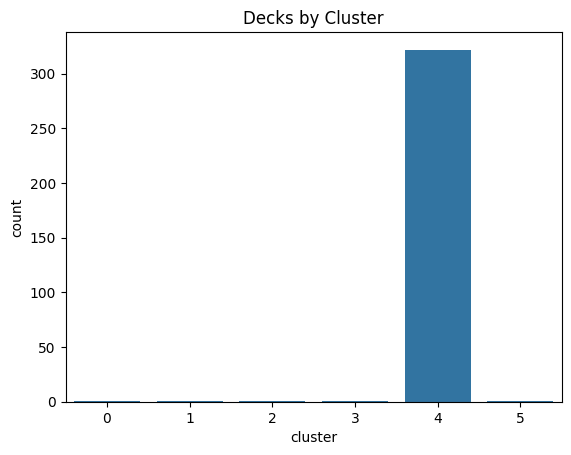

In [10]:
import dask_ml.cluster
import seaborn as sns
import matplotlib.pyplot as plt

n_clusters = 6
oversampling_factor = 7 

km = dask_ml.cluster.KMeans(n_clusters=n_clusters, oversampling_factor=oversampling_factor)
km.fit(deck_vectors)

labels = list(km.labels_.compute()) #We call compute on it because it's lazy
decks_labels = [(all_decks[deck_id]['cards'], label) for deck_id,label in list(zip(all_decks,labels))]
#decks_labels = list(zip(all_decks,labels)) #Now we can pair each deck to its label.

label_counts = [(label,len(decks_by_label(label))) for label in range(n_clusters)]
counts = [count for _, count in label_counts]
points = {
    'cluster':[label for label, _ in label_counts],
    'count':[count for _, count in label_counts],
}

sns.barplot(x="cluster", y="count", data=points).set_title("Decks by Cluster")
plt.savefig('figure 1')

In [11]:
clusters = km.predict(deck_vectors)
deck_vectors.append(clusters)

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
plotX = pd.DataFrame(np.array(deck_vectors))
pca_1d = PCA(n_components = 1)
pca_2d = PCA(n_components = 2)
pca_3d = PCA(n_components = 3)

In [ ]:
k = 40
for LABEL in range(8):
    label_set = set(most_common_cards(decks_by_label(LABEL)[0][0], k))
    for deck, label in decks_by_label(LABEL):
        label_set.intersection(set(most_common_cards(deck, k)))
    label_set = set(label_set)
    print("Cluster number {}:".format(LABEL))
    print(label_set)
    print("\n")

Cluster number 0:
{'Urborg, Tomb of Yawgmoth', 'Roaming Throne', 'Phyrexian Reclamation', 'Sol Ring', 'Sheoldred, the Apocalypse', 'Oathsworn Vampire', 'Smoldering Marsh', 'Welcoming Vampire', 'Swords to Plowshares', "Patriarch's Bidding", 'Phyrexian Arena', 'Rakish Heir', 'Swamp', 'Stensia Masquerade', 'Sorin of House Markov // Sorin, Ravenous Neonate', 'Shattered Sanctum', 'Patron of the Vein', 'Stromkirk Captain', 'Plateau', 'Vito, Thorn of the Dusk Rose', 'Scrubland', 'Nomad Outpost', 'Skullclamp', 'Sacred Foundry', 'Ruinous Ultimatum', 'Plains', "Teferi's Protection", "Urza's Incubator", 'Path to Exile', 'Olivia Voldaren', 'Sundown Pass', 'Sorin, Imperious Bloodlord', 'Vampiric Tutor', 'Sanctum Seeker', 'Savai Triome', 'Nighthawk Scavenger', "Olivia's Wrath", 'The Meathook Massacre', 'Village Rites', 'Orcish Bowmasters'}


Cluster number 1:
{'Gauntlet of Power', 'Highway Robbery', 'Thrill of Possibility', 'Spiteful Banditry', 'Gauntlet of Might', 'Seize the Spoils', 'Swiftfoot Boo

IndexError: list index out of range

In [17]:
#returns the distribution of a card on the 8 clusters. 
# (e.g., a card appearing on decks of only one cluster will look like this [1,0,0,0,0,0,0,0]
# one appearing equally on decks from two different clusters
# like this [.5, 0, 0,.5, 0, 0, 0, 0] and so on).
def apparition_ratio(a_card):
    label_count = [0]*8
    for deck, label in decks_labels:
        if a_card in [card_name for _,card_name in deck]:
            label_count[label]+=1
    total_apps = sum(label_count)
    return ([count/total_apps for count in label_count],total_apps)
  
import math 

#just good all square root of dot product.
def distance(x,y):
    dist = 0.0
    for i, elem in enumerate(x):
        dist+= (elem-y[i])*(elem-y[i])
    return math.sqrt(dist)
#returns the k cards whose apparition vectors are closest
# (using Euclidian distance) to a given card.
def closest_cards(a_card, k):
    this_card = apparition_ratio(a_card)[0]
    distances = []
    for name in all_card_names:
        dist = distance(apparition_ratio(name)[0],this_card)
        distances.append((name, dist))
    distances.sort(key = lambda x: x[1])
    distances = [(name, dist) for name, dist in distances if name!=a_card]
    return [name for name,_ in distances[:k] ]

### DUDADADA

In [18]:
import pickle
with open("all_cards.pickle", "wb") as handle:
    pickle.dump(all_cards, handle)

In [19]:
def getCommander(deck_id):
    if len(all_decks[deck_id]['commanders']) == 2:
        return  all_decks[deck_id]['commanders'][0], all_decks[deck_id]['commanders'][1]
    return all_decks[deck_id]['commanders'][0]

## Per risalire alla carta
Utilizzeremo la API del servizio Scryfall, che permette all'utente di leggerla meglio


# Proviamo ad Ontologizzare

In [92]:
from linkml_runtime.loaders import yaml_loader
from mtg_ontology.helpers import instance_to_graph 
from rdflib import Graph, Literal, RDF, URIRef, Namespace

# Specifica il percorso del tuo file .owl.tll
onto = "mtg_ontology.owl.tll"

# Crea un grafo RDF
g = Graph()

# Carica il file Turtle nel grafo RDF
g.parse(onto, format="turtle")

# Namespace per l'ontologia
Scryfall = Namespace("https://api.scryfall.com/cards/")
MTGO = Namespace("https://cmdoret.net/mtg_ontology/")
MTGFandom = Namespace("https://mtg.fandom.com/wiki/")
EDHREC = Namespace("https://edhrec.com/articles/new-edhrec-feature-salt/")

# Aggiungi il namespace al grafo
g.bind("scryfall", Scryfall)
g.bind("mtg", MTG)

# Funzione per creare URI per le istanze
def create_card_uri(card_uid):
    #return URIRef(Scryfall + card_uid)
    return URIRef(card_uid.replace(" ", "_"))

In [78]:
for s in g.subjects():
    print(f"soggetto: {s}")
    for p, o in g.predicate_objects(s):    
        print(f'oggetto:{o}, predicato:{p}')
    print("------------")


soggetto: https://cmdoret.net/mtg_ontology/
oggetto:http://www.w3.org/2002/07/owl#Ontology, predicato:http://www.w3.org/1999/02/22-rdf-syntax-ns#type
oggetto:mtgo, predicato:http://www.w3.org/2000/01/rdf-schema#label
oggetto:https://cmdoret.net/mtg_ontology/AbilityCollection, predicato:http://purl.obolibrary.org/obo/IAO_0000700
oggetto:https://cmdoret.net/mtg_ontology/CardCollection, predicato:http://purl.obolibrary.org/obo/IAO_0000700
oggetto:https://cmdoret.net/mtg_ontology/NamedThing, predicato:http://purl.obolibrary.org/obo/IAO_0000700
oggetto:https://cmdoret.net/mtg_ontology/Thing, predicato:http://purl.obolibrary.org/obo/IAO_0000700
oggetto:GNU GPL v3.0, predicato:http://purl.org/dc/terms/license
oggetto:Magic The Gathering Ontology., predicato:http://purl.org/dc/terms/title
oggetto:https://cmdoret.github.io/mtg_ontology/, predicato:http://www.w3.org/2000/01/rdf-schema#seeAlso
oggetto:2023-03-20T16:26:53, predicato:https://w3id.org/linkml/generation_date
oggetto:1.7.0, predicato:

In [86]:

for s in g.subjects(object=MTGO.AbilityKeyword):
    print(f"{s}")


https://mtg.fandom.com/wiki/deathtouch
https://mtg.fandom.com/wiki/defender
https://mtg.fandom.com/wiki/double_strike
https://mtg.fandom.com/wiki/enchant
https://mtg.fandom.com/wiki/equip
https://mtg.fandom.com/wiki/first_strike
https://mtg.fandom.com/wiki/flash
https://mtg.fandom.com/wiki/flying
https://mtg.fandom.com/wiki/haste
https://mtg.fandom.com/wiki/hexproof
https://mtg.fandom.com/wiki/indestructible
https://mtg.fandom.com/wiki/lifelink
https://mtg.fandom.com/wiki/menace
https://mtg.fandom.com/wiki/protection
https://mtg.fandom.com/wiki/reach
https://mtg.fandom.com/wiki/trample
https://mtg.fandom.com/wiki/vigilance
https://mtg.fandom.com/wiki/ward


In [95]:
for p, o in g.subject_objects(predicate=MTGFandom.defender):
    print(f"s:{p}              o:{o}")

for p, o in g.predicate_objects(subject=MTGFandom.defender):
    print(f"p:{p}              o:{o}")

for p, o in g.subject_predicates(object=MTGFandom.defender):
    print(f"s:{p}              p:{o}")

p:http://www.w3.org/1999/02/22-rdf-syntax-ns#type              o:http://www.w3.org/2002/07/owl#Class
p:http://www.w3.org/1999/02/22-rdf-syntax-ns#type              o:https://cmdoret.net/mtg_ontology/AbilityKeyword
p:http://www.w3.org/2000/01/rdf-schema#label              o:defender
s:n8e689804af64438aa9572450ff8bdd4ab178              p:http://www.w3.org/1999/02/22-rdf-syntax-ns#first
s:https://cmdoret.net/mtg_ontology/AbilityKeyword              p:https://w3id.org/linkml/permissible_values


In [99]:
for name, card in all_cards.items():
    try:
        card_uri = create_card_uri(name)
        #card_uri = create_card_uri(card['uid'])
        g.add((card_uri, RDF.type, MTG.Card))
        #g.add((card_uri, MTG.NamedThing, Literal(name)))
        g.add((card_uri, MTGO.color,                 Literal(card['colors'])))
        g.add((card_uri, MTGO.mana_cost,             Literal(card['manaValue'])))
        #g.add((card_uri, EDHREC.Just_a_Pinch,      Literal(card['salt'])))
        g.add((card_uri, MTGO.text,                  Literal(card['text'])))
        g.add((card_uri, MTGO.rarity,                Literal(card['rarity'])))
        g.add((card_uri, MTGO.hasDefaultCategory,    Literal(card['defaultCategory'])))#Rinnova categoria 
        g.add((card_uri, Scryfall.uid,              Literal(card['uid'])))
        g.add((card_uri, MTGO.card_type,             Literal(card["types"])))
        if card['subTypes']:
            g.add((card_uri, MTGO.card_subtype,      Literal(card['subTypes'])))
        if card['superTypes']:
            g.add((card_uri, MTGO.card_supertype,    Literal(card['superTypes'])))
        if card['manaProduction']:
            g.add((card_uri, MTGO.mana_production,   Literal(card['manaProduction'])))
        if card['power']:
            g.add((card_uri, MTGO.power,             Literal(card['power'])))
        if card['toughness']:
            g.add((card_uri, MTGO.toughness,         Literal(card['toughness'])))
    except Exception as e:
        print(e)
        continue

# Salva il grafo popolato
g.serialize("populated_mtg_ontology.owl", format="xml")


<Graph identifier=N5129041d7e934ef5bccbc52d3abb8bd3 (<class 'rdflib.graph.Graph'>)>

In [98]:
for p, o in g.subject_objects(predicate=MTGFandom.defender):
    print(f"s:{p}              o:{o}")

for p, o in g.predicate_objects(subject=MTGFandom.defender):
    print(f"p:{p}              o:{o}")

for p, o in g.subject_predicates(object=MTGFandom.defender):
    print(f"s:{p}              p:{o}")

p:http://www.w3.org/1999/02/22-rdf-syntax-ns#type              o:http://www.w3.org/2002/07/owl#Class
p:http://www.w3.org/1999/02/22-rdf-syntax-ns#type              o:https://cmdoret.net/mtg_ontology/AbilityKeyword
p:http://www.w3.org/2000/01/rdf-schema#label              o:defender
s:n8e689804af64438aa9572450ff8bdd4ab178              p:http://www.w3.org/1999/02/22-rdf-syntax-ns#first
s:https://cmdoret.net/mtg_ontology/AbilityKeyword              p:https://w3id.org/linkml/permissible_values


In [102]:
import random
from typing import get_args

s = list(g.subjects())[random.randint(1,len(g))-1]
# print(f"""
# {s} è una {MTG.Card}
# dai seguenti colori: {[c for c in g.objects(subject=s,predicate=MTG.color)]}
# """)

for p, o in g.predicate_objects(s):    
   print(f'{s} is a {o}, {p}')
        

Barrage_Tyrant is a https://cmdoret.net/mtg_ontology/Card, http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Barrage_Tyrant is a [], https://cmdoret.net/mtg_ontology/color
Barrage_Tyrant is a {4}{R}, https://cmdoret.net/mtg_ontology/mana_cost
Barrage_Tyrant is a Devoid (This card has no color.)
{2}{R}, Sacrifice another colorless creature: Barrage Tyrant deals damage equal to the sacrificed creature's power to any target., https://cmdoret.net/mtg_ontology/text
Barrage_Tyrant is a rare, https://cmdoret.net/mtg_ontology/rarity
Barrage_Tyrant is a Removal, https://cmdoret.net/mtg_ontology/hasDefaultCategory
Barrage_Tyrant is a 08a83120-c0c5-4277-acae-6ecb6f6bf3e1, https://api.scryfall.com/cards/uid
Barrage_Tyrant is a ['Creature'], https://cmdoret.net/mtg_ontology/card_type
Barrage_Tyrant is a ['Eldrazi'], https://cmdoret.net/mtg_ontology/card_subtype
Barrage_Tyrant is a {'W': None, 'U': None, 'B': None, 'R': None, 'G': None, 'C': None}, https://cmdoret.net/mtg_ontology/mana_production
Barr

In [ ]:
from owlready2 import *

# Carica l'ontologia popolata
populated_onto = get_ontology("populated_mtg_ontology.owl").load()

# Esegui il ragionamento
with populated_onto:
    sync_reasoner(keep_tmp_file=True)

print("lalalla")
print(populated_onto)

# Estrai le nuove conoscenze inferite
for card in populated_onto.Card.instances():
    print(card)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /home/axten/.local/lib/python3.10/site-packages/owlready2/hermit:/home/axten/.local/lib/python3.10/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmppk9hcld3


lalalla
get_ontology("https://cmdoret.net/mtg_ontology/")


* Owlready2 * HermiT took 1.868290662765503 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)
